In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

UNDERSTANDING THE DATA

In [2]:
df=pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [4]:
df.shape

(16598, 11)

In [5]:
df.loc[df['JP_Sales']<0.05,'JP_Sales']

60       0.00
61       0.04
65       0.04
68       0.01
72       0.02
         ... 
16593    0.00
16594    0.00
16595    0.00
16596    0.00
16597    0.00
Name: JP_Sales, Length: 12812, dtype: float64

DATA PREPARATION

Dont need other_sales, since global sales are given along with three biggest regions

In [6]:
df.drop(columns='Other_Sales',inplace=True)

In [7]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,31.37


In [8]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Global_Sales      0
dtype: int64

Since there are only 58 publisher entries missing out of close to 16600, these can be deleted. However, for year entries, since there are 271 missing entries, these can be replaced with the mean values

In [10]:
df.dropna(subset=['Publisher'], inplace=True)

In [9]:
df['Year'].describe()

count    16327.000000
mean      2006.406443
std          5.828981
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

<Axes: xlabel='Year', ylabel='Count'>

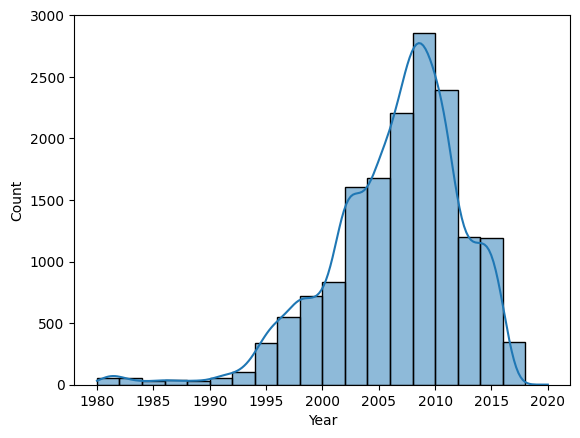

In [14]:
sns.histplot(df['Year'],kde=True,bins=20)

Since it is right skewed, we will replace null values with median instead of mean, as per statistical recommendations

In [16]:
df['Year'].fillna(df['Year'].median(),inplace=True)

C:\Users\Aappu\AppData\Local\Temp\ipykernel_21364\3504779897.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(df['Year'].median(),inplace=True)


In [17]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Global_Sales    0
dtype: int64

In [18]:
df.loc[df.duplicated()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales


No duplicated values, all null values have been handled. Time to move to analysis!
ANALYSIS

In [19]:
df['Genre'].value_counts()

Genre
Action          3309
Sports          2343
Misc            1712
Role-Playing    1486
Shooter         1308
Adventure       1282
Racing          1248
Platform         884
Simulation       863
Fighting         846
Strategy         678
Puzzle           581
Name: count, dtype: int64

In [37]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,31.37


<Axes: xlabel='Year', ylabel='Count'>

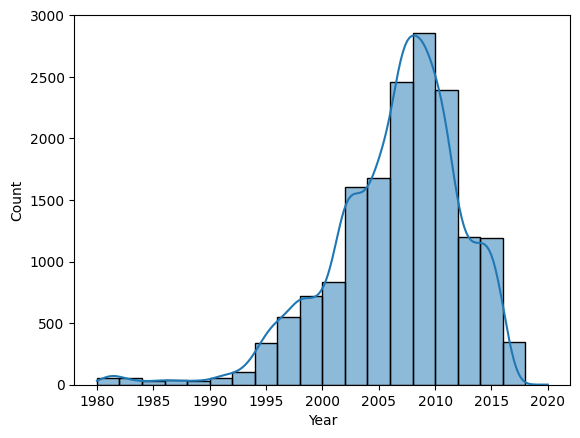

In [39]:
sns.histplot(df['Year'],kde=True,bins=20)

Most popular era for selling games was between 2005 and 2010

<Axes: xlabel='count', ylabel='Genre'>

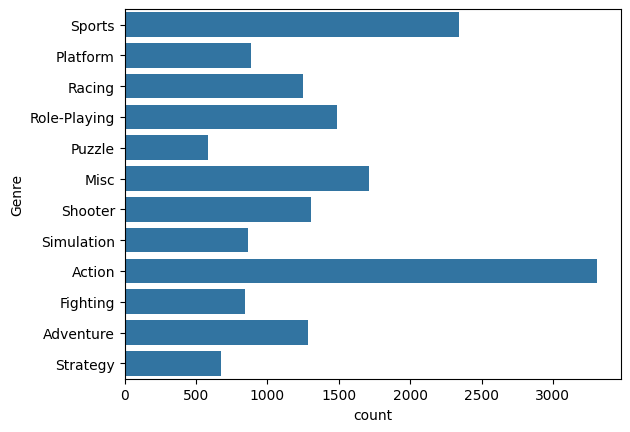

In [51]:
sns.countplot(y='Genre',data=df)

Action games were the most popular

<Axes: xlabel='Global_Sales', ylabel='Genre'>

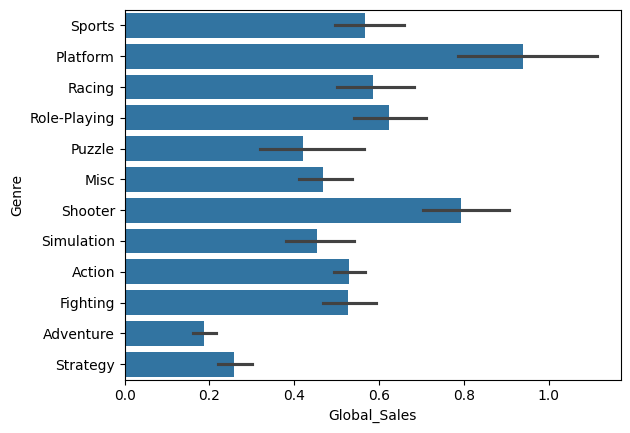

In [55]:
sns.barplot(y='Genre',x='Global_Sales',data=df)

However, platform genre games generated more revenue globally

In [41]:
df.corr(numeric_only=True)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Global_Sales
Rank,1.000000,0.176825,-0.401236,-0.379068,-0.268056,-0.427391
Year,0.176825,1.000000,-0.091157,0.005930,-0.169495,-0.074710
NA_Sales,-0.401236,-0.091157,1.000000,0.767672,0.449864,0.941036
EU_Sales,-0.379068,0.005930,0.767672,1.000000,0.435658,0.902817
JP_Sales,-0.268056,-0.169495,0.449864,0.435658,1.000000,0.611893
Global_Sales,-0.427391,-0.074710,0.941036,0.902817,0.611893,1.000000


<Axes: >

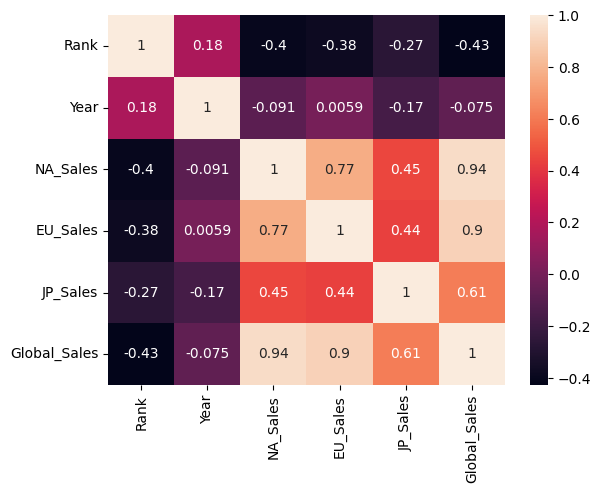

In [50]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

<Axes: xlabel='Year', ylabel='NA_Sales'>

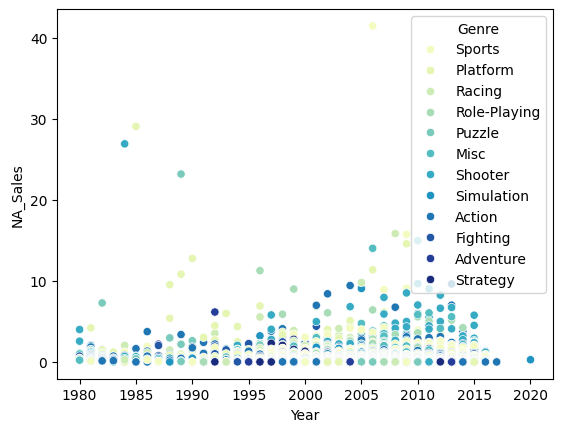

In [43]:
sns.scatterplot(x='Year',y='NA_Sales',data=df,hue='Genre',palette='YlGnBu')

<Axes: xlabel='Year', ylabel='EU_Sales'>

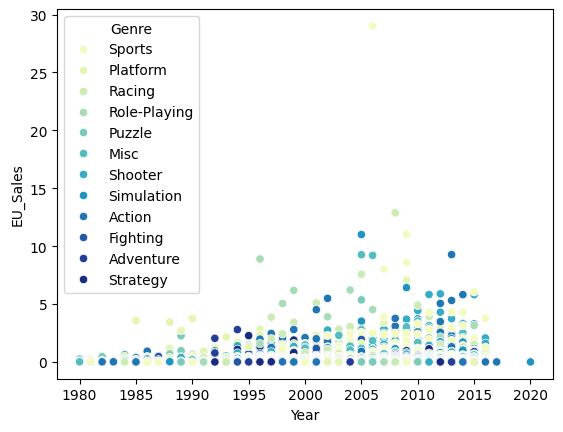

In [47]:
sns.scatterplot(x='Year',y='EU_Sales',data=df,hue='Genre',palette='YlGnBu')

<Axes: xlabel='Year', ylabel='Global_Sales'>

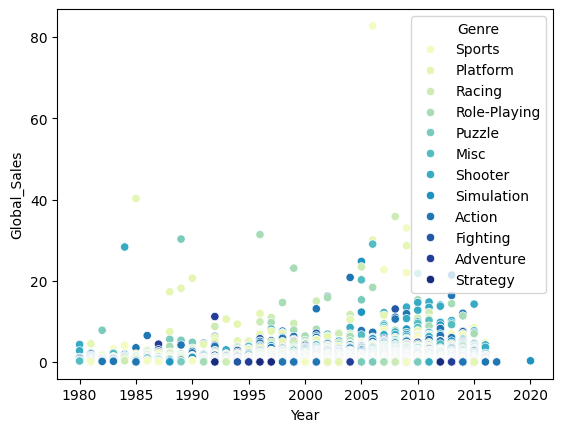

In [49]:
sns.scatterplot(x='Year',y='Global_Sales',data=df,hue='Genre',palette='YlGnBu')

No significant corellation between either of the regions or global sales with year

<Axes: xlabel='NA_Sales', ylabel='Global_Sales'>

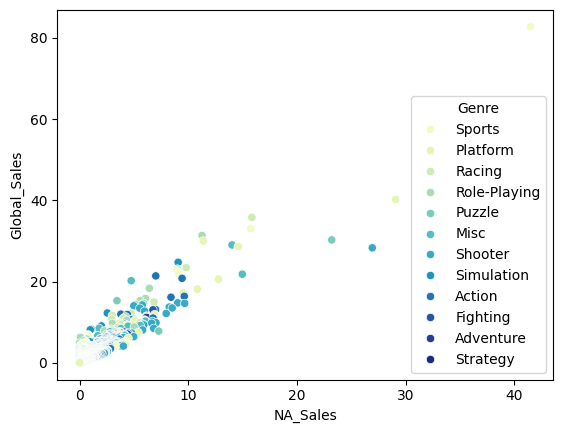

In [63]:
sns.scatterplot(x='NA_Sales',y='Global_Sales',data=df,hue='Genre',palette='YlGnBu')

<Axes: xlabel='EU_Sales', ylabel='Global_Sales'>

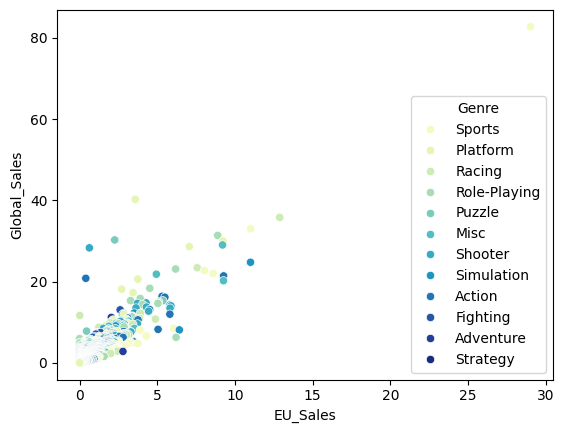

In [64]:
sns.scatterplot(x='EU_Sales',y='Global_Sales',data=df,hue='Genre',palette='YlGnBu')

Both NA and EU have a strong corellation with global sales

In [62]:
publishers=df['Publisher'].value_counts().reset_index()
publishers.columns=['publisher','count']
top_5_pubs=publishers.head(5)['publisher']
new_df=df.loc[df['Publisher'].isin(top_5_pubs)]
new_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,14.76
31,32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,14.64
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,14.24
34,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,14.03
35,36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,13.73
...,...,...,...,...,...,...,...,...,...,...
16558,16561,Pro Evolution Soccer 2008,PC,2007.0,Sports,Konami Digital Entertainment,0.00,0.01,0.00,0.01
16567,16570,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014.0,Action,Namco Bandai Games,0.00,0.00,0.01,0.01
16584,16587,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.01
16591,16594,Myst IV: Revelation,PC,2004.0,Adventure,Ubisoft,0.01,0.00,0.00,0.01


<Axes: xlabel='Global_Sales', ylabel='Publisher'>

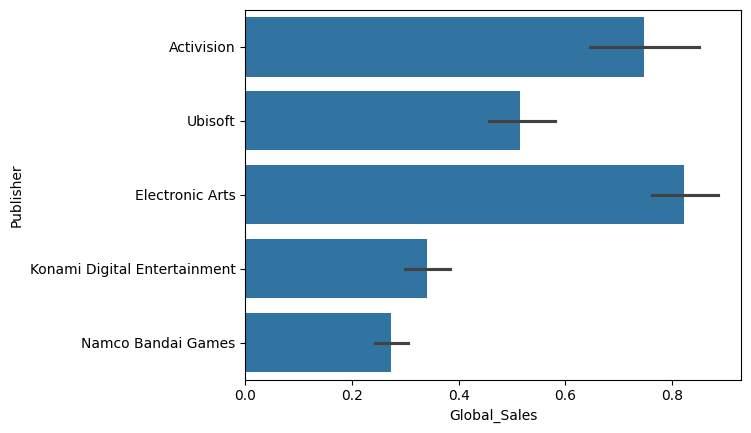

In [68]:
sns.barplot(x='Global_Sales', y='Publisher', data=new_df)

<Axes: xlabel='count', ylabel='Publisher'>

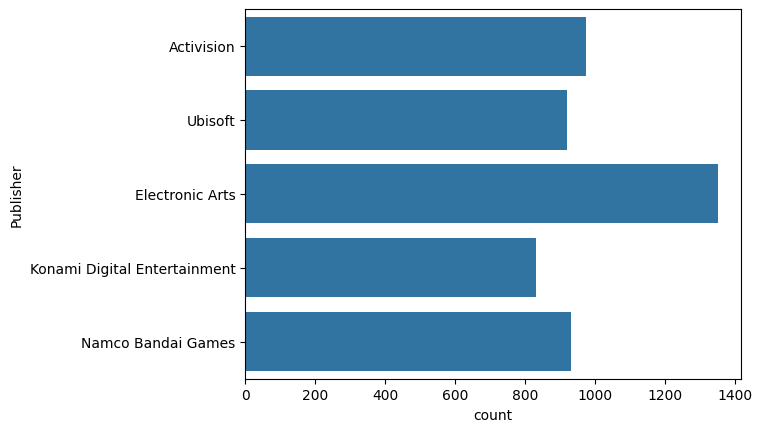

In [70]:
sns.countplot( y='Publisher', data=new_df)

EA have generated the most revenue globally, and have also sold the most games (makes sense). However, Namco Bandai, despite selling as much as the rest, has a significant drop in revenue.

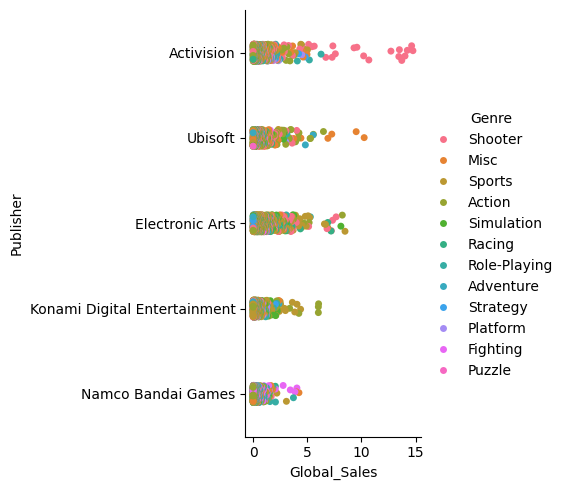

In [72]:
sns.catplot(x='Global_Sales', y='Publisher', data=new_df,hue='Genre')

<Axes: xlabel='Global_Sales', ylabel='Publisher'>

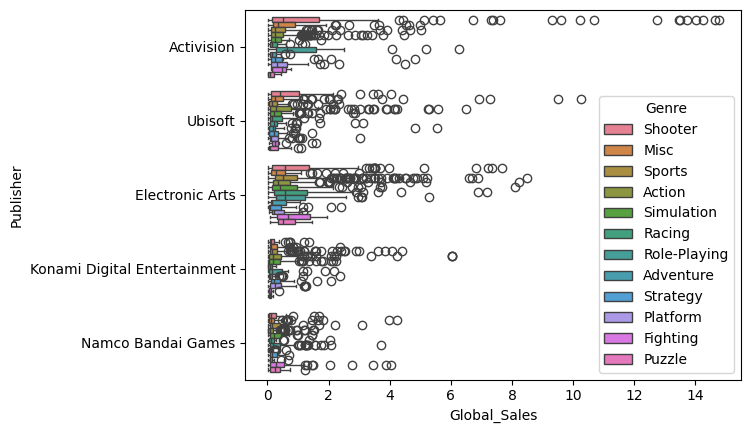

In [73]:
sns.boxplot(x='Global_Sales', y='Publisher', data=new_df,hue='Genre')

Activision has some very large outliers (very well performing games) in the shooter category

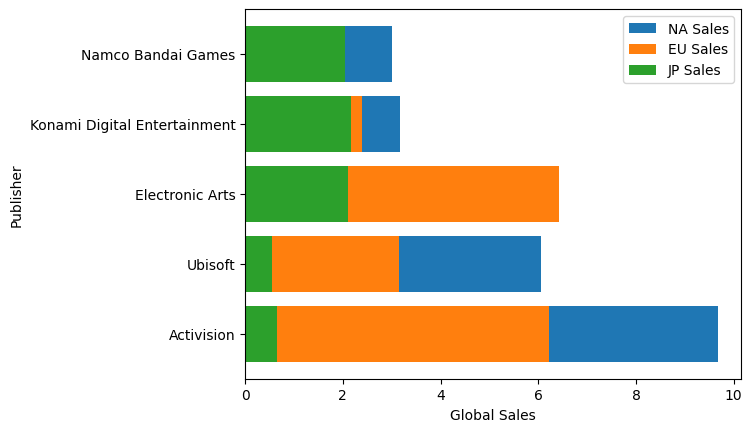

In [96]:
bar1=plt.barh(new_df['Publisher'], new_df['NA_Sales'])
bar2=plt.barh(new_df['Publisher'], new_df['EU_Sales'])
bar3=plt.barh(new_df['Publisher'], new_df['JP_Sales'])
plt.xlabel('Global Sales')
plt.ylabel('Publisher')
plt.legend(['NA Sales', 'EU Sales', 'JP Sales'], loc='upper right')


This shows how top 5 publishers have performed in different regions. EA has surprisingly not done well in NA. But both EA and Activision had a lot of outliers for shooting games, and seem to have done well in EU. This might indicate a preference for shooting games in the EU.

<Axes: xlabel='EU_Sales', ylabel='Genre'>

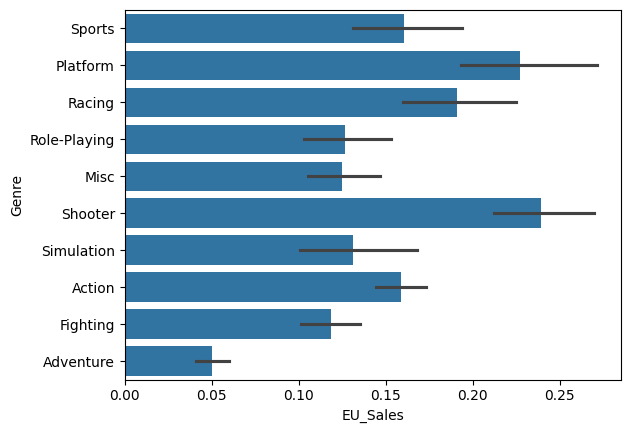

In [101]:
genre=df['Genre'].value_counts().reset_index()
genre.columns=['genre','count']
top_10_genre=genre.head(10)['genre']
new_df2=df.loc[df['Genre'].isin(top_10_genre)]
sns.barplot(y='Genre',x='EU_Sales',data=new_df2)

As expected, shooter games have generated the most revenue in the EU. Surprisingly, platform games have also done well.

In [74]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,31.37


In [77]:
ea=df.loc[df['Publisher']=='Electronic Arts']

<Axes: xlabel='Year', ylabel='Count'>

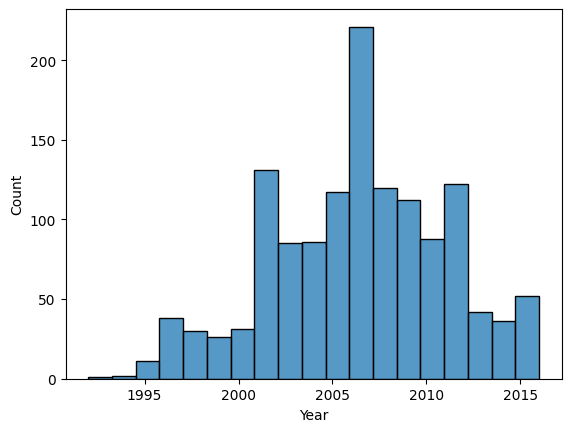

In [86]:
sns.histplot(ea['Year'])

Finally, we can see why EA might be struggling in NA

<Axes: xlabel='NA_Sales', ylabel='Genre'>

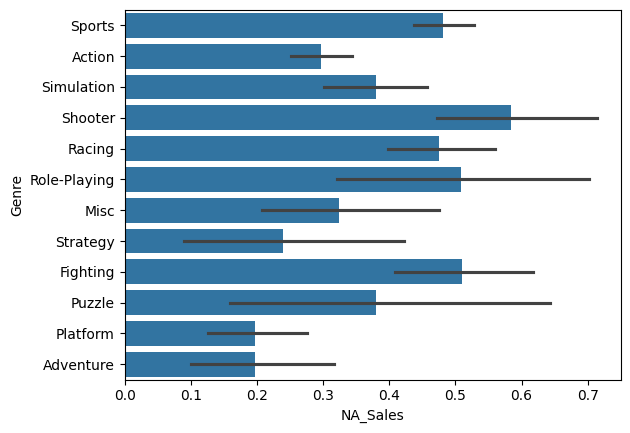

In [110]:
sns.barplot(y='Genre',x='NA_Sales',data=ea)

<Axes: xlabel='NA_Sales', ylabel='Genre'>

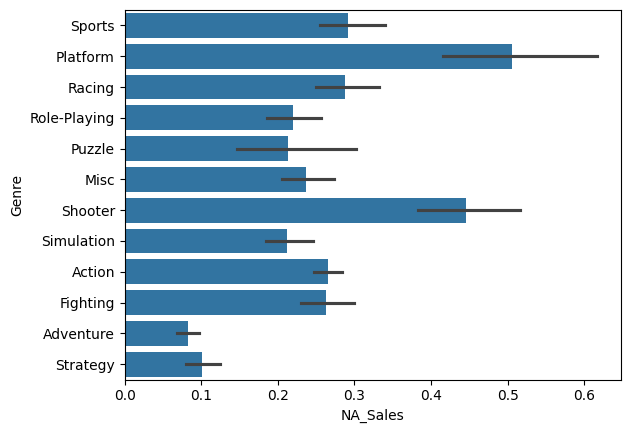

In [109]:
sns.barplot(y='Genre',x='NA_Sales',data=df)

EA Might be struggling in NA due to less focus on platform games, despite their popularity in NA